# Doctor's Consultation Fees Prediction

## Predict A Doctor's Consultation Fee 
We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better.
#### Size of training set: 5961 records

#### Size of test set: 1987 records

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Uploading Training Dataset

In [2]:
train = pd.read_excel("Final_Train.xlsx")
# Reading first 5 rows
train.head(5)

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  
4              100% 4 Feedback Keelkattalai, Chennai   250

In [3]:
# Checking columns
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

### FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [4]:
# Let's check number of rows and columns in our data
print("We have {} rows  and {} columns in our dataset.".format((len(train)),(len(train.columns))))

We have 5961 rows  and 7 columns in our dataset.


In [5]:
# check train column types

ctype = train.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64      1
1      object      6

##### Dataset contains `object` and `integer` datatypes.

In [6]:
# Checking the information of features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


##### Dataset with 2 types of  data contains 5961  rows and 7 columns contains some missing values.

In [7]:
# Missing values
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [8]:
# Finding the percentage of missing values
print("Percentage of missing values in Rating:"+str(round(train['Rating'].isnull().sum()/len(train)*100,2)) + "%")
print("Percentage of missing values in Place:"+str(round(train['Place'].isnull().sum()/len(train)*100,2)) + "%")
print("Percentage of missing values in Miscellaneous_Info:"+str(round(train['Miscellaneous_Info'].isnull().sum()/len(train)*100,2)) + "%")

Percentage of missing values in Rating:55.39%
Percentage of missing values in Place:0.42%
Percentage of missing values in Miscellaneous_Info:43.95%


##### In 2 features we have a lot of data missing . While the 3rd features missing values can be replaced easily.

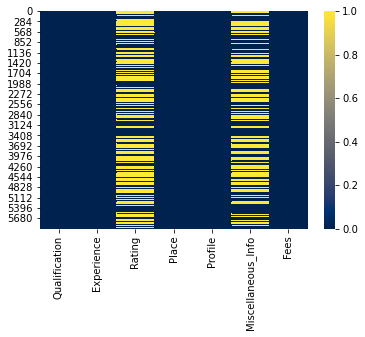

In [9]:
# Drawing heatmap
sns.heatmap(train.isnull(),cmap='cividis')

In [10]:
# Featuristic descripition
train. describe(include='all')

Qualification          Experience Rating                  Place  \
count           5961                5961   2659                   5936   
unique          1420                  64     51                    877   
top              BDS  9 years experience   100%  HSR Layout, Bangalore   
freq             488                 323    684                     75   
mean             NaN                 NaN    NaN                    NaN   
std              NaN                 NaN    NaN                    NaN   
min              NaN                 NaN    NaN                    NaN   
25%              NaN                 NaN    NaN                    NaN   
50%              NaN                 NaN    NaN                    NaN   
75%              NaN                 NaN    NaN                    NaN   
max              NaN                 NaN    NaN                    NaN   

        Profile                                 Miscellaneous_Info  \
count      5961                                               3341   
unique        6                                               2998   
top     Dentist  Acrylic Partial Denture Crowns and Bridges Fix...   
freq       1397                                                 40   
mean        NaN                                                NaN   
std         NaN                                                NaN   
min         NaN                                                NaN   
25%         NaN                                                NaN   
50%         NaN                                                NaN   
75%         NaN                                                NaN   
max         NaN                                                NaN   

               Fees  
count   5961.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean     307.944640  
std      190.920373  
min        5.000000  
25%      150.000000  
50%      300.000000  
75%      500.000000  
max      950.000000

#### Key Observations :-
1. In categorical feature `Qualification` there are 1420 unique values and `BDS` is with maximum frequency.
2. In other categorical feature `Experience` ,there are 64 unique values and `9` years of experience is maximum with a frequency of 323 .
3. Categorical feature `Profile` contains `6` unique values with Dentist with frequency 13891.
4. Numerical feature `Fees` have differnce in mean and median values which means that skewness may be there ,while there is high difference in 75th percentile and 100th percentile.

### Feature pre-processing

In [11]:
# Let's check the qualifications-which degree doctors having

train['Qualification'].value_counts()[:10]

BDS                                               488
BHMS                                              477
BAMS                                              471
MBBS                                              334
MBBS, MS - ENT                                    220
MBBS, MD - Dermatology                            178
MBBS, MD - General Medicine                       177
MBBS, MD - Dermatology , Venereology & Leprosy    140
BHMS, MD - Homeopathy                              93
MBBS, DDVL                                         92
Name: Qualification, dtype: int64

#### As what we seeing or we know that for a doctor MBBS, BDS,BAMS are main degrees for their medical future.  These are  also very common in our dataset. Now we are going to  add values of 1 and 0 to those who are having and not.

In [12]:
train_df=train.Qualification.apply(lambda x:len(x.split(",")))
# Checking qualification numbers
print("Maximum qualification are {}  \n\nQualifications are - {}".format(train_df.max(),train.Qualification[train_df.idxmax()]))
print("\n\n")
print("Minimum qualification is {}  \n\nQualification is - {}".format(train_df.min(),train.Qualification[train_df.idxmin()]))


Maximum qualification are 10  

Qualifications are - Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology



Minimum qualification is 1  

Qualification is - BAMS


In [13]:
#train['qualification']=train['Qualification'].apply(lambda x: pd.Series(str(x).replace("-",",")))

In [14]:
train.head()

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  
4              100% 4 Feedback Keelkattalai, Chennai   250

In [15]:

train[['qual1','qual2','qual3','qual4','qual5','qual6','qual7','qual8','qual9','qual10']]=(train['Qualification'].apply(lambda x: pd.Series(str(x).split(","))))

In [16]:
pd.set_option("display.max_columns",None)

train.head(5)

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees          qual1  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           BHMS   
1              98% 76 Feedback Whitefield, Bangalore   350           BAMS   
2                                                NaN   300           MBBS   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  BSc - Zoology   
4              100% 4 Feedback Keelkattalai, Chennai   250           BAMS   

                       qual2 qual3 qual4 qual5 qual6 qual7 qual8 qual9 qual10  
0            MD - Homeopathy   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
1     MD - Ayurveda Medicine   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
2   MS - Otorhinolaryngology   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
3                       BAMS   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  
4                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN

In [17]:
# Converting the Experience feature
train['years_exp'] = train['Experience'].str.slice(stop=2).astype(int)

In [18]:
train.shape

(5961, 18)

### Rating feature

In [19]:
train.head()

Qualification           Experience Rating  \
0           BHMS, MD - Homeopathy  24 years experience   100%   
1    BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2  MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3             BSc - Zoology, BAMS  12 years experience    NaN   
4                            BAMS  20 years experience   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees          qual1  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           BHMS   
1              98% 76 Feedback Whitefield, Bangalore   350           BAMS   
2                                                NaN   300           MBBS   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  BSc - Zoology   
4              100% 4 Feedback Keelkattalai, Chennai   250           BAMS   

                       qual2 qual3 qual4 qual5 qual6 qual7 qual8 qual9 qual10  \
0            MD - Homeopathy   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1     MD - Ayurveda Medicine   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2   MS - Otorhinolaryngology   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3                       BAMS   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   years_exp  
0         24  
1         12  
2          9  
3         12  
4         20

In [20]:
# Treating column Rating
train['Rating'].fillna("-99%",inplace=True)
train['Rating']=train['Rating'].str.slice(stop=-1).astype(int)

In [21]:
train.head(5)

Qualification           Experience  Rating  \
0           BHMS, MD - Homeopathy  24 years experience     100   
1    BAMS, MD - Ayurveda Medicine  12 years experience      98   
2  MBBS, MS - Otorhinolaryngology   9 years experience     -99   
3             BSc - Zoology, BAMS  12 years experience     -99   
4                            BAMS  20 years experience     100   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees          qual1  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           BHMS   
1              98% 76 Feedback Whitefield, Bangalore   350           BAMS   
2                                                NaN   300           MBBS   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  BSc - Zoology   
4              100% 4 Feedback Keelkattalai, Chennai   250           BAMS   

                       qual2 qual3 qual4 qual5 qual6 qual7 qual8 qual9 qual10  \
0            MD - Homeopathy   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1     MD - Ayurveda Medicine   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2   MS - Otorhinolaryngology   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3                       BAMS   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   years_exp  
0         24  
1         12  
2          9  
3         12  
4         20

### Place feature

In [22]:
pd.set_option("display.max_rows",None)

In [23]:
train['City'] = train['Place'].str.split(',').str[1]
train['Locality'] = train['Place'].str.split(',').str[0]

In [24]:
train.head()

Qualification           Experience  Rating  \
0           BHMS, MD - Homeopathy  24 years experience     100   
1    BAMS, MD - Ayurveda Medicine  12 years experience      98   
2  MBBS, MS - Otorhinolaryngology   9 years experience     -99   
3             BSc - Zoology, BAMS  12 years experience     -99   
4                            BAMS  20 years experience     100   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees          qual1  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           BHMS   
1              98% 76 Feedback Whitefield, Bangalore   350           BAMS   
2                                                NaN   300           MBBS   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  BSc - Zoology   
4              100% 4 Feedback Keelkattalai, Chennai   250           BAMS   

                       qual2 qual3 qual4 qual5 qual6 qual7 qual8 qual9 qual10  \
0            MD - Homeopathy   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1     MD - Ayurveda Medicine   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2   MS - Otorhinolaryngology   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3                       BAMS   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   years_exp        City           Locality  
0         24   Ernakulam           Kakkanad  
1         12   Bangalore         Whitefield  
2          9   Bangalore    Mathikere - BEL  
3         12   Bangalore  Bannerghatta Road  
4         20     Chennai       Keelkattalai

In [25]:
train[train['Locality'].isna()].index

Int64Index([  91,  502,  599,  605,  724, 1002, 1083, 1210, 2078, 2178, 2328,
            3099, 3228, 3418, 3443, 3744, 3804, 4004, 4758, 4823, 4847, 5058,
            5187, 5551, 5723],
           dtype='int64')

In [26]:
train[train['City'].isna()].index

Int64Index([  91,  502,  599,  605,  724, 1002, 1083, 1210, 2078, 2178, 2328,
            3099, 3228, 3418, 3443, 3744, 3804, 3980, 4004, 4758, 4823, 4847,
            5058, 5187, 5551, 5723],
           dtype='int64')

In [27]:
train.drop(index=train[train['City'].isna()].index,axis=0,inplace=True)

### Miscellaneous feature

In [28]:
train['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

##### This feature  not ideal to treat as it contains the information which we already contains in location variables and rating variable. so we are not ddealing with this feature.

In [29]:
train.head()

Qualification           Experience  Rating  \
0           BHMS, MD - Homeopathy  24 years experience     100   
1    BAMS, MD - Ayurveda Medicine  12 years experience      98   
2  MBBS, MS - Otorhinolaryngology   9 years experience     -99   
3             BSc - Zoology, BAMS  12 years experience     -99   
4                            BAMS  20 years experience     100   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees          qual1  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           BHMS   
1              98% 76 Feedback Whitefield, Bangalore   350           BAMS   
2                                                NaN   300           MBBS   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  BSc - Zoology   
4              100% 4 Feedback Keelkattalai, Chennai   250           BAMS   

                       qual2 qual3 qual4 qual5 qual6 qual7 qual8 qual9 qual10  \
0            MD - Homeopathy   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
1     MD - Ayurveda Medicine   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
2   MS - Otorhinolaryngology   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
3                       BAMS   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4                        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

   years_exp        City           Locality  
0         24   Ernakulam           Kakkanad  
1         12   Bangalore         Whitefield  
2          9   Bangalore    Mathikere - BEL  
3         12   Bangalore  Bannerghatta Road  
4         20     Chennai       Keelkattalai

In [30]:
# Dropping columns with are done with preprocessing
train.drop(['Qualification','qual6','qual7','qual8','qual9','qual10','Experience','Place','Miscellaneous_Info'],axis=1,inplace=True)

In [31]:
train.head()

Rating         Profile  Fees          qual1                      qual2  \
0     100       Homeopath   100           BHMS            MD - Homeopathy   
1      98        Ayurveda   350           BAMS     MD - Ayurveda Medicine   
2     -99  ENT Specialist   300           MBBS   MS - Otorhinolaryngology   
3     -99        Ayurveda   250  BSc - Zoology                       BAMS   
4     100        Ayurveda   250           BAMS                        NaN   

  qual3 qual4 qual5  years_exp        City           Locality  
0   NaN   NaN   NaN         24   Ernakulam           Kakkanad  
1   NaN   NaN   NaN         12   Bangalore         Whitefield  
2   NaN   NaN   NaN          9   Bangalore    Mathikere - BEL  
3   NaN   NaN   NaN         12   Bangalore  Bannerghatta Road  
4   NaN   NaN   NaN         20     Chennai       Keelkattalai

In [32]:
train.isnull().sum()

Rating          0
Profile         0
Fees            0
qual1           0
qual2        1937
qual3        4564
qual4        5559
qual5        5816
years_exp       0
City            0
Locality        0
dtype: int64

In [33]:
# filling NaN values.
train.fillna("no", inplace=True)

In [34]:
train.head()

Rating         Profile  Fees          qual1                      qual2  \
0     100       Homeopath   100           BHMS            MD - Homeopathy   
1      98        Ayurveda   350           BAMS     MD - Ayurveda Medicine   
2     -99  ENT Specialist   300           MBBS   MS - Otorhinolaryngology   
3     -99        Ayurveda   250  BSc - Zoology                       BAMS   
4     100        Ayurveda   250           BAMS                         no   

  qual3 qual4 qual5  years_exp        City           Locality  
0    no    no    no         24   Ernakulam           Kakkanad  
1    no    no    no         12   Bangalore         Whitefield  
2    no    no    no          9   Bangalore    Mathikere - BEL  
3    no    no    no         12   Bangalore  Bannerghatta Road  
4    no    no    no         20     Chennai       Keelkattalai

### Data Visualization

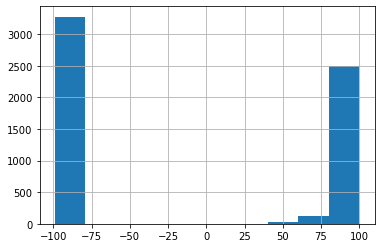

In [35]:
train['Rating'].hist(bins=10)

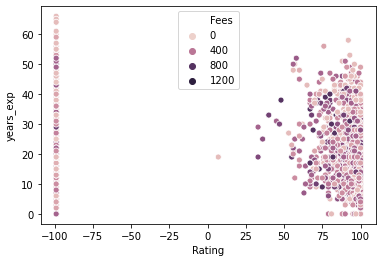

In [36]:
sns.scatterplot(x='Rating',y="years_exp",data=train,hue='Fees')

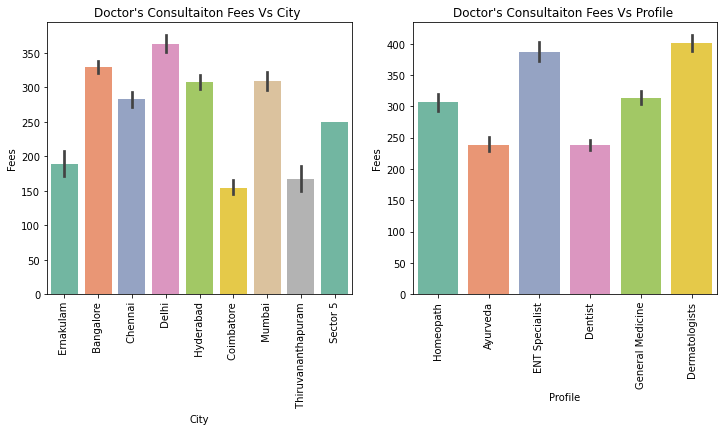

In [37]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x='City',y='Fees',data=train,palette='Set2')
plt.xticks(rotation=90)
plt.title("Doctor's Consultaiton Fees Vs City ")

plt.subplot(1,2,2)
sns.barplot(x='Profile',y="Fees",data=train,palette='Set2')
plt.xticks(rotation=90)
plt.title("Doctor's Consultaiton Fees Vs Profile ")
plt.show()

##### Cities with more population is  charging more fees than cities with less population.

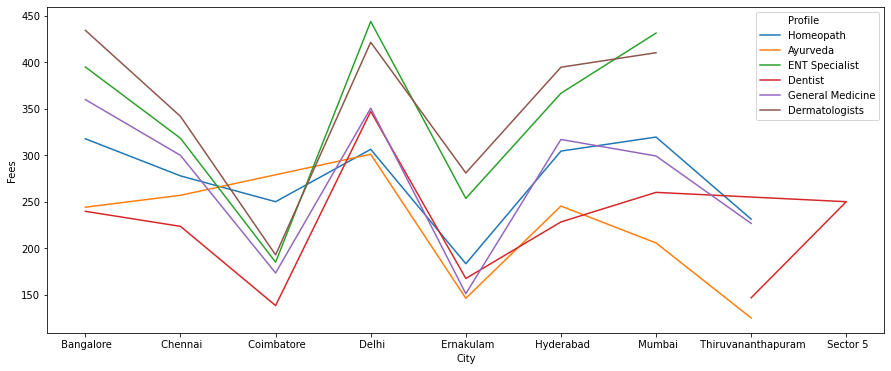

In [38]:
plt.figure(figsize=(15,6))
sns.lineplot(x='City',y='Fees',data=train,hue="Profile",ci=None)
plt.show()



###### Checking the fees and city features we can conclude that based on the profile of a doctor ,fees selected is depending on the location. As we can see that in cities like Coimbatore and Ernakulam ,all profiles are having less fees than others while city like Delhi ,all proflies of doctors are with high fees.

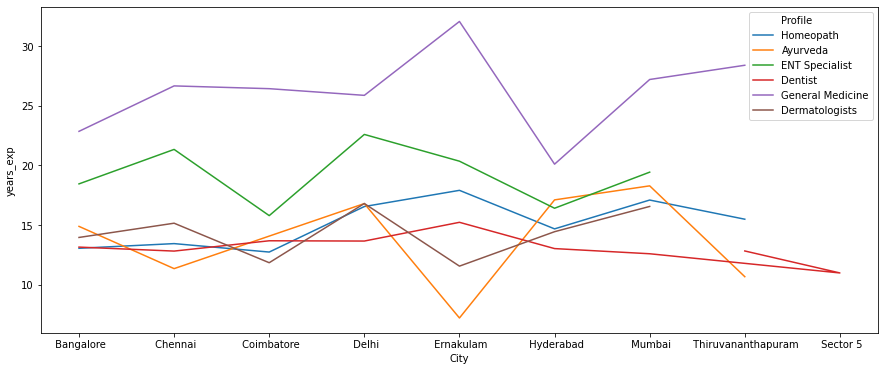

In [39]:
plt.figure(figsize=(15,6))
sns.lineplot(x='City',y='years_exp',data=train,hue="Profile",ci=None)

plt.show()

###### General Medicine is with maximum years of experience while while Dentist with minimum and with less fluctuations in experience.

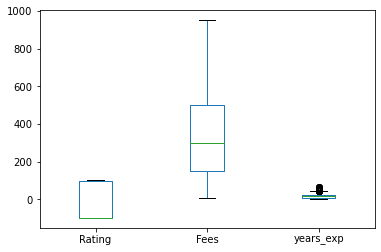

In [40]:
train.plot(kind='box')

Some high year experience is present in some of data.

In [41]:
train['years_exp'].quantile((0.25,0.50,0.75,0.90,0.95,0.98,0.99,1))

0.25     9.0
0.50    15.0
0.75    23.0
0.90    35.0
0.95    40.0
0.98    45.0
0.99    49.0
1.00    66.0
Name: years_exp, dtype: float64

###### As we can see that 100th percentile is having some conditons which may be valid but it also going to interept the model accuracy . So we are going to remove this value.

In [42]:
train=train[train['years_exp']<60]

In [43]:
train.shape

(5930, 11)

In [44]:
train.describe()

Rating         Fees    years_exp
count  5930.000000  5930.000000  5930.000000
mean    -12.170658   308.997976    17.333558
std      96.456263   190.850171    11.036671
min     -99.000000     5.000000     0.000000
25%     -99.000000   150.000000     9.000000
50%     -99.000000   300.000000    15.000000
75%      96.000000   500.000000    23.000000
max     100.000000   950.000000    59.000000

In [45]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
for i in train.columns:
    if train[i].dtypes=="object":
        train[i]=encode.fit_transform(train[i])


### Outliers

In [46]:
from scipy.stats import zscore
z =np.abs(zscore(train))
train = train[(z<3).all(axis=1)]

In [47]:
train.shape

(5551, 11)

In [48]:
train.head()

Rating  Profile  Fees  qual1  qual2  qual3  qual4  qual5  years_exp  City  \
0     100        5   100      8    252    406    212     95         24     4   
1      98        0   350      5    241    406    212     95         12     0   
2     -99        3   300     78    334    406    212     95          9     0   
3     -99        0   250     12      7    406    212     95         12     0   
4     100        0   250      5    426    406    212     95         20     1   

   Locality  
0       296  
1       855  
2       452  
3        68  
4       335

### splitting independent and dependent features


In [49]:
x=train.drop(['Fees'],axis=1)
y=train['Fees']

In [50]:
x.shape,y.shape

((5551, 10), (5551,))

In [51]:
features=x.columns

In [52]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)
x=pd.DataFrame(X,columns=features)

In [53]:
x.head()

Rating   Profile     qual1     qual2     qual3     qual4     qual5  \
0  1.193627  1.530006 -0.993015 -0.308009  0.379012  0.130357  0.046606   
1  1.172818 -1.462195 -1.070010 -0.392161  0.379012  0.130357  0.046606   
2 -0.876874  0.333126  0.803543  0.319304  0.379012  0.130357  0.046606   
3 -0.876874 -1.462195 -0.890354 -2.182298  0.379012  0.130357  0.046606   
4  1.193627 -1.462195 -1.070010  1.023119  0.379012  0.130357  0.046606   

   years_exp      City  Locality  
0   0.633345  0.404074 -0.455972  
1  -0.475329 -1.322650  1.737482  
2  -0.752498 -1.322650  0.156155  
3  -0.475329 -1.322650 -1.350619  
4   0.263787 -0.890969 -0.302940

### Splitting training and testing

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=.25,random_state=42)

In [55]:
print("X->Training - {}  \nY->Training - {} \n\nX->Testing - {} \nY->Testing - {}".format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

X->Training - (4163, 10)  
Y->Training - (4163,) 

X->Testing - (1388, 10) 
Y->Testing - (1388,)


In [56]:

models=[LinearRegression(), Lasso(), Ridge(), ElasticNet(), 
        SVR(), KNeighborsRegressor(), DecisionTreeRegressor(),
         RandomForestRegressor(),]

In [57]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
r2=[]

for m in models:
    x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=.25,random_state=42)
    m.fit(x_train,y_train)
    print("Score of ",m,"is ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    
    pred=m.predict(x_test)
    print("mean absolute error is",mean_absolute_error(y_test,pred))
    mean_abs_e.append(mean_absolute_error(y_test,pred))
    print("mean squared error is",mean_squared_error(y_test,pred))
    mean_sqr_e.append(mean_squared_error(y_test,pred))
    print("R2 score is : ",r2_score(y_test,pred))
    r2.append(r2_score(y_test,pred))
    print("\n")

Score of  LinearRegression() is  0.10133869692697328
mean absolute error is 141.68515673836498
mean squared error is 29811.64214173909
R2 score is :  0.10996451942568497


Score of  Lasso() is  0.10109350583362209
mean absolute error is 141.80302641629362
mean squared error is 29797.995956183673
R2 score is :  0.11037193037141813


Score of  Ridge() is  0.10133869289003183
mean absolute error is 141.68584974166652
mean squared error is 29811.617089666448
R2 score is :  0.10996526736279655


Score of  ElasticNet() is  0.09287652120007728
mean absolute error is 143.47399901075806
mean squared error is 30097.39138211767
R2 score is :  0.10143339050380618


Score of  SVR() is  0.0584090129730962
mean absolute error is 140.47859485995676
mean squared error is 31013.87178583521
R2 score is :  0.074071594307493


Score of  KNeighborsRegressor() is  0.35741210584880423
mean absolute error is 140.3121037463977
mean squared error is 32192.069971181554
R2 score is :  0.038896135568226575


Score 

In [58]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
pred= rfc.predict(x_test) 
r2_score(y_test,pred)


feature_importance = pd.DataFrame(list(x.keys()), rfc.feature_importances_)
print(feature_importance.sort_index(ascending=False))

                  0
0.270757   Locality
0.203682  years_exp
0.131350      qual2
0.112013    Profile
0.099459       City
0.084944     Rating
0.046195      qual3
0.044544      qual1
0.006724      qual4
0.000334      qual5


In [59]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score=cross_val_score(RandomForestRegressor(),x,y,cv=i)
    
    print("Score at ",i,"is",score.mean())
    print(score.std())

Score at  2 is 0.13822055112010423
0.0015579447226927723
Score at  3 is 0.15688894491684602
0.01798483905303974
Score at  4 is 0.15493499275343905
0.022513991115183388
Score at  5 is 0.16070763283818504
0.027829738838874803
Score at  6 is 0.1629668060779335
0.025586885053961998
Score at  7 is 0.1699080312629764
0.025823347395060734
Score at  8 is 0.16935790486667432
0.021727427363416433
Score at  9 is 0.17618906564302042
0.019985856737483945


In [60]:
from sklearn.model_selection import GridSearchCV 


param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
}
Cv_rfc = GridSearchCV(estimator= rfc, param_grid=param_grid,cv= 9)
Cv_rfc.fit(x_train, y_train)
print(Cv_rfc.best_params_)

{'max_depth': 8, 'max_features': 'log2'}


In [61]:
rfc=RandomForestRegressor( max_features="log2",max_depth =8)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_decision =rfc.predict(x_test)

rfc_r = r2_score(y_test,pred_decision)
print(rfc_r)
rfc_a = mean_absolute_error(y_test,pred_decision)
print(rfc_a)

rfc_score = cross_val_score(rfc,x,y,cv=8)
rfc_cv =rfc_score.mean()
print(rfc_cv)

0.19830681543264506
131.24615189564733
0.19270150111583353


### Saving the model

In [62]:
import joblib
filename="rfc_doctor_consultation.obj"
joblib.dump(rfc,filename)

['rfc_doctor_consultation.obj']

### Uploading Testing Dataset

In [63]:
test = pd.read_excel("Final_Test.xlsx")
# Reading first 5 rows
test.head(5)

Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info  
0                                                NaN  
1                                                NaN  
2                   70% 4 Feedback KK Nagar, Chennai  
3                                                NaN  
4  General Dentistry Conservative Dentistry Cosme...

In [64]:
# Checking columns
test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [65]:
# Let's check number of rows and columns in our data
print("We have {} rows  and {} columns in our dataset.".format((len(test)),(len(test.columns))))

We have 1987 rows  and 6 columns in our dataset.


In [66]:
# check train column types

ctype = test.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0      object      6

In [67]:
# Checking the information of features
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [68]:
# Missing values
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [69]:
# Finding the percentage of missing values
print("Percentage of missing values in Rating:"+str(round(test['Rating'].isnull().sum()/len(test)*100,2)) + "%")
print("Percentage of missing values in Place:"+str(round(test['Place'].isnull().sum()/len(test)*100,2)) + "%")
print("Percentage of missing values in Miscellaneous_Info:"+str(round(test['Miscellaneous_Info'].isnull().sum()/len(test)*100,2)) + "%")

Percentage of missing values in Rating:54.86%
Percentage of missing values in Place:0.3%
Percentage of missing values in Miscellaneous_Info:41.97%


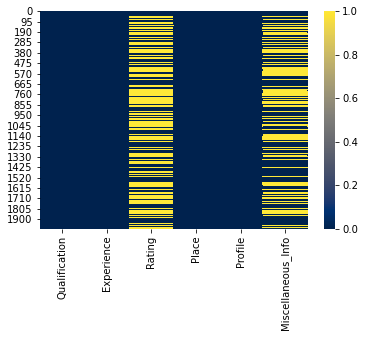

In [70]:
# Drawing heatmap
sns.heatmap(test.isnull(),cmap='cividis')

In [71]:
# Featuristic descripition
test. describe(include='all')

Qualification           Experience Rating                 Place  \
count           1987                 1987    897                  1981   
unique           630                   57     36                   592   
top             BAMS  10 years experience   100%  Andheri West, Mumbai   
freq             153                  110    223                    27   

                 Profile                                 Miscellaneous_Info  
count               1987                                               1153  
unique                 6                                               1084  
top     General Medicine  Acrylic Partial Denture Crowns and Bridges Fix...  
freq                 444                                                 10

#### Freatures pre-processing

In [72]:
# Let's check the qualifications-which degree doctors having

test['Qualification'].value_counts()[:10]

BAMS                                              153
BHMS                                              150
BDS                                               144
MBBS                                              107
MBBS, MD - Dermatology                             64
MBBS, MS - ENT                                     60
MBBS, MD - Dermatology , Venereology & Leprosy     53
MBBS, MD - General Medicine                        50
MBBS, DDVL                                         31
MBBS, Diploma in Otorhinolaryngology (DLO)         30
Name: Qualification, dtype: int64

In [73]:
test_df=test.Qualification.apply(lambda x:len(x.split(",")))
# Checking qualification numbers
print("Maximum qualification are {}  \n\nQualifications are - {}".format(test_df.max(),test.Qualification[test_df.idxmax()]))
print("\n\n")
print("Minimum qualification is {}  \n\nQualification is - {}".format(test_df.min(),test.Qualification[test_df.idxmin()]))


Maximum qualification are 17  

Qualifications are - BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)



Minimum qualification is 1  

Qualification is - MBBS


In [74]:
# Converting the qualification column
test[['qual1','qual2','qual3','qual4','qual5','qual6','qual7','qual8','qual9','qual10','qual11','qual12','qual13','qual14','qual15','qual16','qual17']]=(test['Qualification'].apply(lambda x: pd.Series(str(x).split(","))))

In [75]:
test.head(5)

Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info qual1  \
0                                                NaN  MBBS   
1                                                NaN  MBBS   
2                   70% 4 Feedback KK Nagar, Chennai  MBBS   
3                                                NaN  BAMS   
4  General Dentistry Conservative Dentistry Cosme...   BDS   

                                         qual2 qual3 qual4 qual5 qual6 qual7  \
0                                          NaN   NaN   NaN   NaN   NaN   NaN   
1         Diploma in Otorhinolaryngology (DLO)   NaN   NaN   NaN   NaN   NaN   
2                                         DDVL   NaN   NaN   NaN   NaN   NaN   
3                                          NaN   NaN   NaN   NaN   NaN   NaN   
4   MDS - Conservative Dentistry & Endodontics   NaN   NaN   NaN   NaN   NaN   

  qual8 qual9 qual10 qual11 qual12 qual13 qual14 qual15 qual16 qual17  
0   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN

In [76]:
# Converting the Experience feature
test['years_exp'] = test['Experience'].str.slice(stop=2).astype(int)

In [77]:
# Treating column Rating
test['Rating'].fillna("-99%",inplace=True)
test['Rating']=test['Rating'].str.slice(stop=-1).astype(int)

In [78]:
test.head(5)

Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

   Rating                        Place           Profile  \
0     -99       Ghatkopar East, Mumbai  General Medicine   
1     -99  West Marredpally, Hyderabad    ENT Specialist   
2      70            KK Nagar, Chennai    Dermatologists   
3     -99       New Ashok Nagar, Delhi          Ayurveda   
4     100    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info qual1  \
0                                                NaN  MBBS   
1                                                NaN  MBBS   
2                   70% 4 Feedback KK Nagar, Chennai  MBBS   
3                                                NaN  BAMS   
4  General Dentistry Conservative Dentistry Cosme...   BDS   

                                         qual2 qual3 qual4 qual5 qual6 qual7  \
0                                          NaN   NaN   NaN   NaN   NaN   NaN   
1         Diploma in Otorhinolaryngology (DLO)   NaN   NaN   NaN   NaN   NaN   
2                                         DDVL   NaN   NaN   NaN   NaN   NaN   
3                                          NaN   NaN   NaN   NaN   NaN   NaN   
4   MDS - Conservative Dentistry & Endodontics   NaN   NaN   NaN   NaN   NaN   

  qual8 qual9 qual10 qual11 qual12 qual13 qual14 qual15 qual16 qual17  \
0   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   years_exp  
0         35  
1         31  
2         40  
3          0  
4         16

In [79]:
# Treating column Place
test['City'] = test['Place'].str.split(',').str[1]
test['Locality'] = test['Place'].str.split(',').str[0]

In [80]:
# Checking null values in new  Locality column
test[test['Locality'].isna()].index

Int64Index([381, 1494, 1644, 1838, 1925, 1930], dtype='int64')

In [81]:
# checking null values in new City column
test[test['City'].isna()].index

Int64Index([381, 1494, 1644, 1838, 1925, 1930], dtype='int64')

In [82]:
# Dropping null values from city column
test.drop(index=test[test['City'].isna()].index,axis=0,inplace=True)

In [83]:
# Checking values of miscellaneous info
test['Miscellaneous_Info'].unique()

array([nan, '70% 4 Feedback KK Nagar, Chennai',
       'General Dentistry Conservative Dentistry Cosmetic/ Aesthetic Dentistry',
       ..., '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment',
       '1 Feedback Pallikaranai, Chennai ₹500'], dtype=object)

###### Miscellaneous info contains mixed values of different columns.  So we are not treating it ,we will drop it.

In [84]:
# Dropping columns with are done with preprocessing
test.drop(['Qualification','qual6','qual7','qual8','qual9','qual10','qual11','qual12','qual13','qual14','qual15','qual16','qual17','Experience','Place','Miscellaneous_Info'],axis=1,inplace=True)

In [85]:
# Checking null values
test.isnull().sum()

Rating          0
Profile         0
qual1           0
qual2         603
qual3        1492
qual4        1858
qual5        1945
years_exp       0
City            0
Locality        0
dtype: int64

In [86]:
# filling NaN values.
test.fillna("no", inplace=True)

In [87]:
test.head()

Rating           Profile qual1  \
0     -99  General Medicine  MBBS   
1     -99    ENT Specialist  MBBS   
2      70    Dermatologists  MBBS   
3     -99          Ayurveda  BAMS   
4     100           Dentist   BDS   

                                         qual2 qual3 qual4 qual5  years_exp  \
0                                           no    no    no    no         35   
1         Diploma in Otorhinolaryngology (DLO)    no    no    no         31   
2                                         DDVL    no    no    no         40   
3                                           no    no    no    no          0   
4   MDS - Conservative Dentistry & Endodontics    no    no    no         16   

         City          Locality  
0      Mumbai    Ghatkopar East  
1   Hyderabad  West Marredpally  
2     Chennai          KK Nagar  
3       Delhi   New Ashok Nagar  
4   Bangalore    Kanakpura Road

### Data Visualization

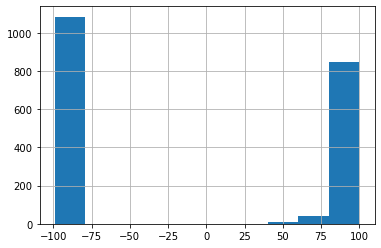

In [88]:
test['Rating'].hist(bins=10)

###### As we have a lot of missing data in Rating column ,due to filling of missing data with a particular value it is showing skewness in column .

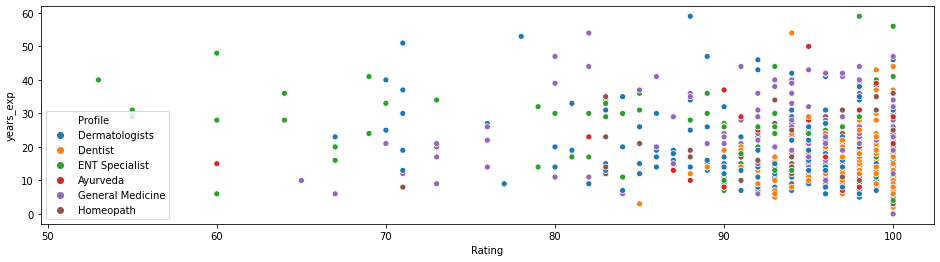

In [89]:
test_1=test[test['Rating']>40]
plt.figure(figsize=(16,4))
sns.scatterplot(x='Rating',y="years_exp",hue='Profile',data=test_1)

###### Dentists are having higher number of ratings in range 90-100.

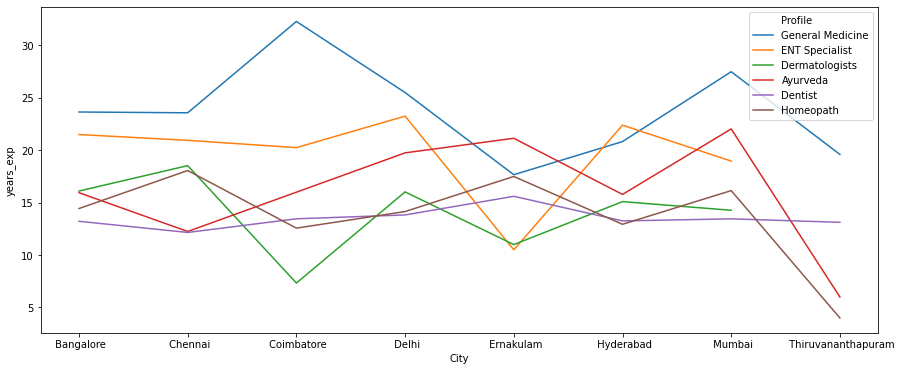

In [90]:
plt.figure(figsize=(15,6))
sns.lineplot(x='City',y='years_exp',data=test,hue="Profile",ci=None)

plt.show()

###### Overall in General Medicine profile is comprised of high years experience while Dermaatologist and Dentist with least year experience are in working state.
###### Based on different cities Dentists are having minimum fluctuations in years of experience  and General Medicine are having maximum fluctuations.

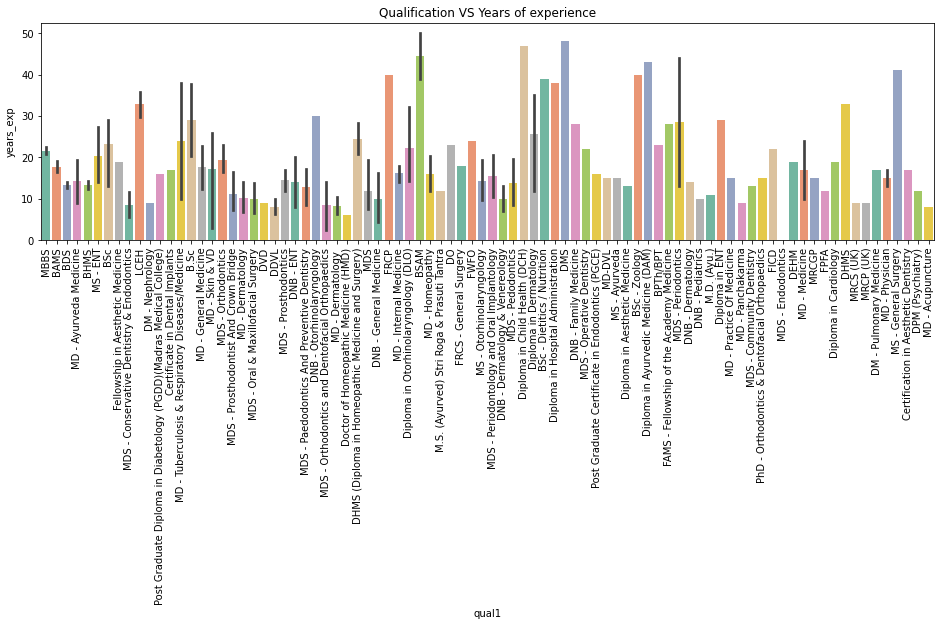

In [91]:
plt.figure(figsize=(16,4))
sns.barplot(x='qual1',y="years_exp",data=test,palette='Set2')
plt.xticks(rotation=90)
plt.title("Qualification VS Years of experience")
plt.show()

#### Outliers 

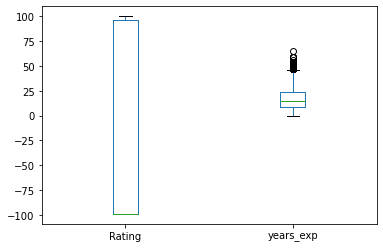

In [92]:
test.plot(kind='box')

There are outliers in year_exp columns.

In [93]:
test['years_exp'].quantile((0.75,0.85,0.95,0.97,0.98,0.99,1))

0.75    24.0
0.85    30.0
0.95    41.0
0.97    44.0
0.98    46.4
0.99    49.0
1.00    65.0
Name: years_exp, dtype: float64

###### 100th percentile is having a 65year of experience .We can'not say it an outliers but it is also changing our model accuracy.

In [94]:
test=test[test['years_exp']<60]

In [95]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
for i in test.columns:
    if test[i].dtypes=="object":
        test[i]=encode.fit_transform(test[i])


In [96]:
from scipy.stats import zscore
z =np.abs(zscore(test))
test = test[(z<3).all(axis=1)]

In [97]:
test.shape

(1859, 10)

In [98]:
Features=test.columns

In [99]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)
x=pd.DataFrame(X,columns=features)

In [100]:
x

Rating   Profile     qual1     qual2     qual3      qual4      qual5  \
0     1.193627  1.530006 -0.993015 -0.308009  0.379012   0.130357   0.046606   
1     1.172818 -1.462195 -1.070010 -0.392161  0.379012   0.130357   0.046606   
2    -0.876874  0.333126  0.803543  0.319304  0.379012   0.130357   0.046606   
3    -0.876874 -1.462195 -0.890354 -2.182298  0.379012   0.130357   0.046606   
4     1.193627 -1.462195 -1.070010  1.023119  0.379012   0.130357   0.046606   
5    -0.876874 -1.462195 -1.070010  1.023119  0.379012   0.130357   0.046606   
6    -0.876874  1.530006 -0.993015  1.023119  0.379012   0.130357   0.046606   
7     1.183222 -0.863755 -1.044345  1.023119  0.379012   0.130357   0.046606   
8    -0.876874  0.931566  0.803543 -0.330959  0.379012   0.130357   0.046606   
9    -0.876874 -0.863755 -0.916019 -2.174648  0.379012   0.130357   0.046606   
10   -0.876874  0.333126  0.803543  0.212202 -3.520330   0.130357   0.046606   
11   -0.876874 -1.462195 -1.070010  1.023119  0.379012   0.130357   0.046606   
12    1.172818 -0.863755 -1.044345 -0.070854  0.379012   0.130357   0.046606   
13   -0.876874 -0.863755 -1.044345 -0.040253  0.379012   0.130357   0.046606   
14   -0.876874  0.333126  0.803543 -1.195427 -3.520330   0.130357   0.046606   
15   -0.876874  0.931566  0.803543 -0.330959  0.379012   0.130357   0.046606   
16   -0.876874  0.333126  0.803543 -1.195427  0.379012   0.130357   0.046606   
17   -0.876874  1.530006  0.803543  0.120400  0.379012   0.130357   0.046606   
18    0.975132  0.333126  0.803543  0.273403  0.379012   0.130357   0.046606   
19    1.193627  0.931566  0.803543  1.023119  0.379012   0.130357   0.046606   
20   -0.876874  0.333126  0.803543 -1.669737  0.379012   0.130357   0.046606   
21   -0.876874  0.931566  0.803543  1.023119  0.379012   0.130357   0.046606   
22   -0.876874  0.931566  0.803543 -0.682867  0.379012   0.130357   0.046606   
23   -0.876874 -0.265315  0.803543 -1.822740  0.379012   0.130357   0.046606   
24   -0.876874 -0.863755 -1.044345  1.023119  0.379012   0.130357   0.046606   
25    1.193627  0.931566  0.803543 -0.667566  0.379012   0.130357   0.046606   
26    1.141604  0.931566  0.803543 -0.330959  0.051030   0.130357   0.046606   
27   -0.876874 -0.863755 -1.044345 -0.070854  0.379012   0.130357   0.046606   
28    1.162413 -0.265315 -0.120401 -0.499263  0.379012   0.130357   0.046606   
29    1.162413 -0.265315  0.803543 -1.822740 -2.038337   0.130357   0.046606   
30   -0.876874 -0.863755 -1.044345  1.023119  0.379012   0.130357   0.046606   
31    1.131200  0.333126  0.803543  0.273403  0.379012   0.130357   0.046606   
32    1.068772  0.931566 -0.479712 -0.208557 -1.394520   0.130357   0.046606   
33   -0.876874 -1.462195 -1.070010  1.023119  0.379012   0.130357   0.046606   
34    1.193627 -0.863755 -1.044345 -0.040253 -1.977600   0.130357   0.046606   
35   -0.876874 -0.863755 -1.044345  1.023119  0.379012   0.130357   0.046606   
36    1.089581  1.530006 -0.993015 -1.379031  0.379012   0.130357   0.046606   
37    0.985536  0.333126  0.803543  0.273403 -3.520330   0.130357   0.046606   
38   -0.876874  0.931566  0.803543 -2.235849  0.379012   0.130357   0.046606   
39    1.193627 -0.863755 -1.044345  0.074499  0.379012   0.130357   0.046606   
40    1.193627  1.530006 -0.993015 -0.636966  0.379012   0.130357   0.046606   
41    1.193627 -1.462195 -1.070010 -1.310180 -3.143758   0.130357   0.046606   
42   -0.876874 -1.462195 -1.070010  1.023119  0.379012   0.130357   0.046606   
43    1.183222  1.530006  1.111524 -1.784490  0.379012   0.130357   0.046606   
44   -0.876874 -0.265315  0.803543 -0.353910  0.318275   0.130357   0.046606   
45    1.193627 -0.863755 -1.044345 -0.009653  0.379012   0.130357   0.046606   
46   -0.876874  0.931566  0.803543  1.023119  0.379012   0.130357   0.046606   
47    1.120795 -0.265315  0.803543 -1.822740  0.379012   0.130357   0.046606   
48   -0.876874 -0.863755 -1.044345 -0.040253 -0.835736   0.130357   0.046606   
49   -0.

### Loading the model

In [101]:
model = joblib.load(filename)
model

RandomForestRegressor(max_depth=8, max_features='log2')

In [102]:
prediction=model.predict(test)

### Conclusion

In [103]:
prediction=pd.DataFrame(prediction)
prediction

0
0     382.671267
1     382.671267
2     353.749888
3     317.142141
4     345.449222
5     352.721717
6     336.536217
7     329.937196
8     362.320799
9     382.671267
10    329.937196
11    382.671267
12    332.285842
13    332.285842
14    397.590920
15    379.238825
16    332.285842
17    409.381695
18    336.536217
19    379.238825
20    397.590920
21    332.285842
22    397.590920
23    382.671267
24    329.937196
25    352.721717
26    382.671267
27    387.681898
28    379.238825
29    358.724024
30    332.285842
31    332.285842
32    336.536217
33    345.449222
34    397.590920
35    387.681898
36    382.671267
37    445.537432
38    476.135792
39    445.537432
40    487.171308
41    382.671267
42    332.285842
43    382.671267
44    387.681898
45    382.671267
46    387.681898
47    329.937196
48    353.749888
49    387.681898
50    382.671267
51    311.378054
52    345.449222
53    397.590920
54    332.285842
55    358.724024
56    397.590920
57    336.536217
58    382.671267
59    487.171308
60    445.537432
61    332.285842
62    332.285842
63    329.937196
64    387.681898
65    397.590920
66    387.681898
67    332.285842
68    397.590920
69    382.671267
70    487.171308
71    336.536217
72    387.681898
73    387.681898
74    336.536217
75    387.681898
76    397.590920
77    332.285842
78    329.937196
79    382.671267
80    329.937196
81    382.671267
82    332.285842
83    445.537432
84    397.590920
85    332.285842
86    379.238825
87    332.285842
88    382.671267
89    330.937196
90    382.671267
91    382.671267
92    404.572858
93    379.238825
94    353.749888
95    382.671267
96    352.721717
97    332.285842
98    379.238825
99    382.671267
100   379.238825
101   358.724024
102   329.937196
103   345.449222
104   382.671267
105   363.251809
106   329.937196
107   382.671267
108   329.937196
109   336.536217
110   345.449222
111   487.171308
112   387.681898
113   330.937196
114   387.681898
115   332.285842
116   336.536217
117   332.285842
118   382.671267
119   382.671267
120   330.937196
121   382.671267
122   352.721717
123   382.671267
124   402.612538
125   397.590920
126   391.744858
127   336.536217
128   332.285842
129   332.285842
130   332.285842
131   382.671267
132   382.671267
133   329.937196
134   329.937196
135   387.681898
136   329.937196
137   345.449222
138   487.171308
139   329.937196
140   382.671267
141   332.285842
142   329.937196
143   382.671267
144   329.937196
145   352.721717
146   329.937196
147   382.671267
148   374.943777
149   379.238825
150   382.671267
151   445.537432
152   382.671267
153   379.238825
154   332.285842
155   332.285842
156   329.937196
157   332.285842
158   382.671267
159   329.937196
160   353.749888
161   332.285842
162   374.943777
163   368.877711
164   382.671267
165   332.285842
166   332.285842
167   332.285842
168   387.681898
169   336.536217
170   476.135792
171   353.721717
172   368.877711
173   374.943777
174   382.671267
175   445.537432
176   445.537432
177   352.721717
178   382.671267
179   445.537432
180   382.671267
181   332.285842
182   332.285842
183   382.671267
184   353.721717
185   382.671267
186   379.238825
187   382.671267
188   332.285842
189   379.238825
190   382.671267
191   329.937196
192   329.937196
193   379.238825
194   397.590920
195   329.937196
196   445.537432
197   332.285842
198   387.681898
199   382.671267
200   329.937196
201   332.285842
202   336.536217
203   382.671267
204   352.721717
205   445.537432
206   382.671267
207   397.590920
208   382.671267
209   379.238825
210   397.590920
211   353.749888
212   382.671267
213   487.171308
214   332.285842
215   332.285842
216   332.285842
217   329.937196
218   336.536217
219   327.588186
220   345.449222
221   379.238825
222   476.135792
223   336.536217
224   332.285842
225   332.285842
226   332.285842
227   393.001771
228   382.671267
229   445.537432
230   382.671267
231   382.671267
232   487.171308
233   336.536217
234   476.135792
235

In [104]:
# Save into csv files
prediction.to_csv("Predicted_fees.csv")